### Imports e Instalaciones

In [ ]:
#Esta es requerida para importar los datos financieros
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from numpy import arange
import numpy as np
import keras
import tensorflow as tf
import datetime
import datetime as dt
import copy

#Matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import style
import matplotlib as mpl

import math

#Sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

# univariate one step problem with lstm
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

#Estas son paqueterías complementarias para la descarga de datos financieros
import pandas
from pandas_datareader import data as pdr
from pandas.plotting import scatter_matrix
import yfinance as yfin
import yfinance as yf
yfin.pdr_override()

#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

### Consultas y creación de los dataframes

Primero vamos a realizar el estudio con los datos de la accion de Amazon individualmente. Para esto vamos a acceder a la tabla con las estadisticas del valor inicial su valor más alto, su valor más bajo, su valorde cierre, su valor de cierre ajustado y el vulomen del día.

In [ ]:
#Establecemos las fechas de consulta:
start = '2014-01-01'
end = '2022-12-31'

consult = "AMZN"
#Tabla completa de los stocks de Amazon
amznT = pdr.get_data_yahoo(consult, start, end)

amznT.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.940001,19.9680,19.701000,19.898500,19.898500,42756000
2014-01-03,19.914499,20.1355,19.811001,19.822001,19.822001,44204000
2014-01-06,19.792500,19.8500,19.421000,19.681499,19.681499,63412000
2014-01-07,19.752001,19.9235,19.714500,19.901501,19.901501,38320000
2014-01-08,19.923500,20.1500,19.802000,20.096001,20.096001,46330000


Vamos también a guardar la tabla completa de stocks para compañías relacionadas con Amazon. El primer grupo se compondrá por compañías similares a Amazon y el segundo grupo por compañías populares.

Primer grupo: Alibaba, Mercado Libre, Etsy e eBay.

In [ ]:
#Tabla completa de los stocks de Alibaba Group Holding Limited
babaT = pdr.get_data_yahoo("BABA", start, end)

babaT.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-19,92.699997,99.699997,89.949997,93.889999,93.889999,271879400
2014-09-22,92.699997,92.949997,89.500000,89.889999,89.889999,66657800
2014-09-23,88.940002,90.480003,86.620003,87.169998,87.169998,39009800
2014-09-24,88.470001,90.570000,87.220001,90.570000,90.570000,32088000
2014-09-25,91.089996,91.500000,88.500000,88.919998,88.919998,28598000


In [ ]:
#Tabla completa de los stocks de MercadoLibre inc.
meliT = pdr.get_data_yahoo("MELI", start, end)

meliT.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,106.720001,107.370003,103.070000,103.410004,101.719154,769100
2014-01-03,104.040001,104.930000,102.959999,103.930000,102.230637,317900
2014-01-06,105.180000,105.180000,101.029999,101.489998,99.830528,632300
2014-01-07,100.500000,101.260002,97.099998,99.110001,97.489441,1040300
2014-01-08,99.089996,100.879997,98.980003,99.470001,97.843552,531600


In [ ]:
#Tabla completa de los stocks de Etsy inc.
etsyT = pdr.get_data_yahoo("ETSY", start, end)

etsyT.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-16,31.000000,35.740002,28.219999,30.000000,30.000000,19763300
2015-04-17,29.770000,30.299999,26.510000,27.580000,27.580000,3965500
2015-04-20,28.770000,28.900000,24.870001,24.900000,24.900000,3076200
2015-04-21,24.969999,26.040001,24.559999,25.750000,25.750000,2184700
2015-04-22,26.000000,26.240000,24.950001,25.120001,25.120001,1442500


In [ ]:
#Tabla completa de los stocks de eBay inc.
ebayT = pdr.get_data_yahoo("EBAY", start, end)

ebayT.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,23.135523,23.148148,22.685184,22.702021,21.280678,23698699
2014-01-03,22.765152,22.807240,22.386364,22.415825,21.012405,22783939
2014-01-06,22.053871,22.079124,21.553030,21.792929,20.428507,42542280
2014-01-07,22.049664,22.319023,21.877104,22.251684,20.858540,33442200
2014-01-08,22.289562,22.567341,21.957071,22.041246,20.661272,30967596


Segundo grupo: Apple, Tesla, Alphabet y Meta.

In [ ]:
#Tabla completa de los stocks de Apple inc.
aaplT = pdr.get_data_yahoo("AAPL", start, end)

aaplT.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.388979,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,17.007010,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.099758,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.977468,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.084982,258529600


In [ ]:
#Tabla completa de los stocks de Tesla inc.
tslaT = pdr.get_data_yahoo("TSLA", start, end)

tslaT.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,9.986667,10.165333,9.770000,10.006667,10.006667,92826000
2014-01-03,10.000000,10.146000,9.906667,9.970667,9.970667,70425000
2014-01-06,10.000000,10.026667,9.682667,9.800000,9.800000,80416500
2014-01-07,9.841333,10.026667,9.683333,9.957333,9.957333,75511500
2014-01-08,9.923333,10.246667,9.917333,10.085333,10.085333,92448000


In [ ]:
#Tabla completa de los stocks de Google inc.
googT = pdr.get_data_yahoo("GOOG", start, end)

googT.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218


In [ ]:
#Tabla completa de los stocks de Meta inc.
metaT = pdr.get_data_yahoo("META", start, end)

metaT.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,54.830002,55.220001,54.189999,54.709999,54.709999,43195500
2014-01-03,55.020000,55.650002,54.529999,54.560001,54.560001,38246200
2014-01-06,54.419998,57.259998,54.049999,57.200001,57.200001,68852600
2014-01-07,57.700001,58.549999,57.220001,57.919998,57.919998,77207400
2014-01-08,57.599998,58.410000,57.230000,58.230000,58.230000,56682400


### Modelos Descriptivos

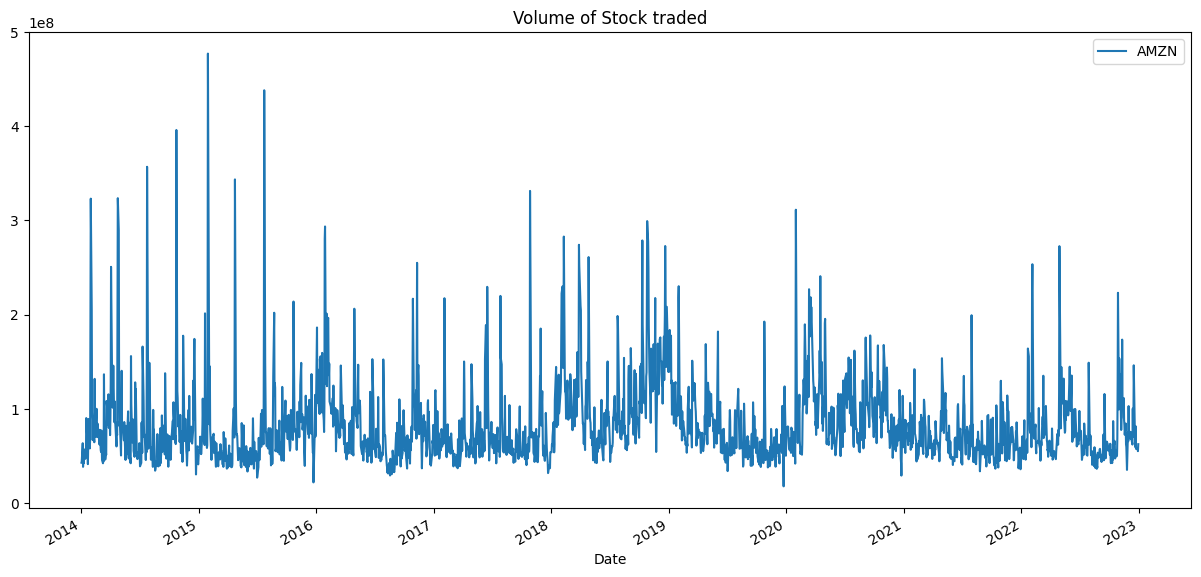

In [ ]:
#Volume empresa
amznT['Volume'].plot(label = consult, figsize = (15,7))
plt.title('Volume of Stock traded')
plt.legend()

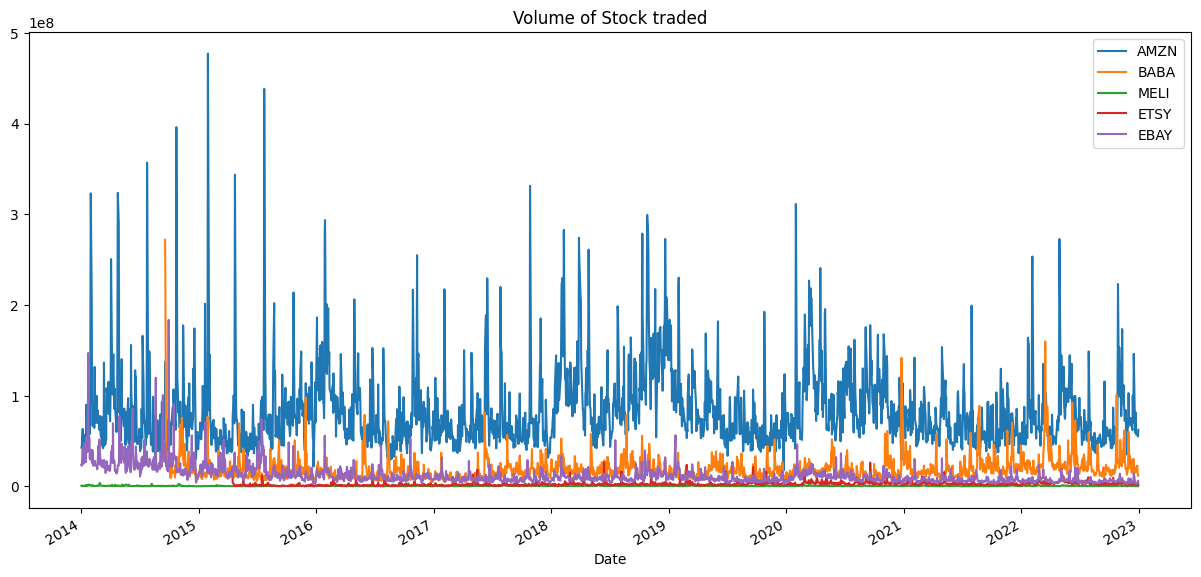

In [ ]:
#Volume grupo 1
amznT['Volume'].plot(label = consult, figsize = (15,7))
babaT['Volume'].plot(label = 'BABA')
meliT['Volume'].plot(label = 'MELI')
etsyT['Volume'].plot(label = 'ETSY')
ebayT['Volume'].plot(label = 'EBAY')
plt.title('Volume of Stock traded')
plt.legend()

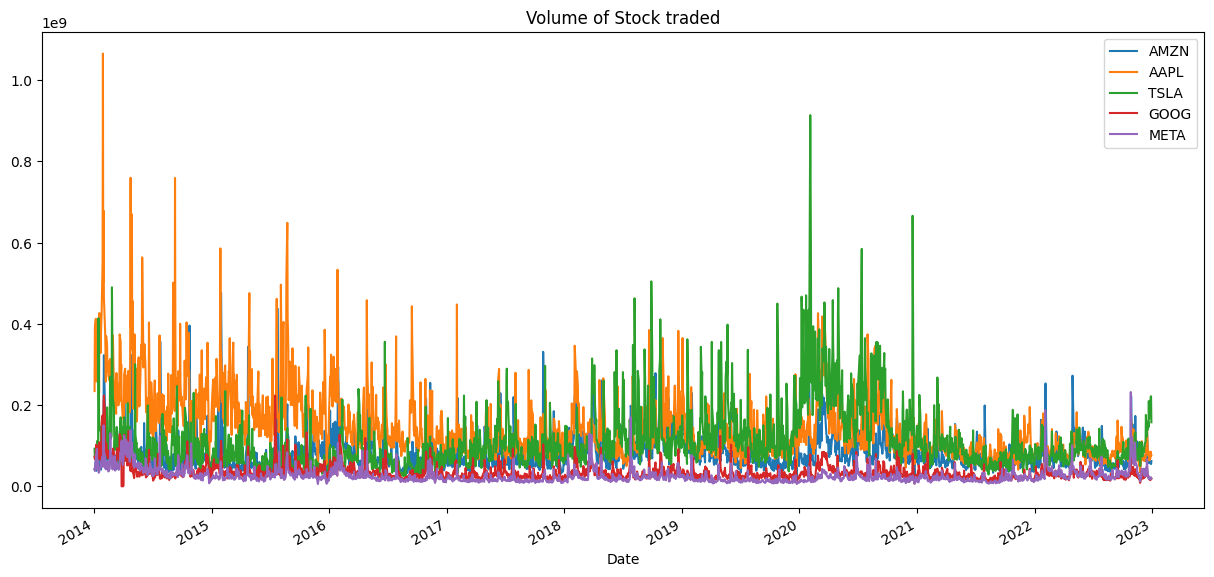

In [ ]:
#Volume grupo 2
amznT['Volume'].plot(label = consult, figsize = (15,7))
aaplT['Volume'].plot(label = 'AAPL')
tslaT['Volume'].plot(label = 'TSLA')
googT['Volume'].plot(label = 'GOOG')
metaT['Volume'].plot(label = 'META')
plt.title('Volume of Stock traded')
plt.legend()

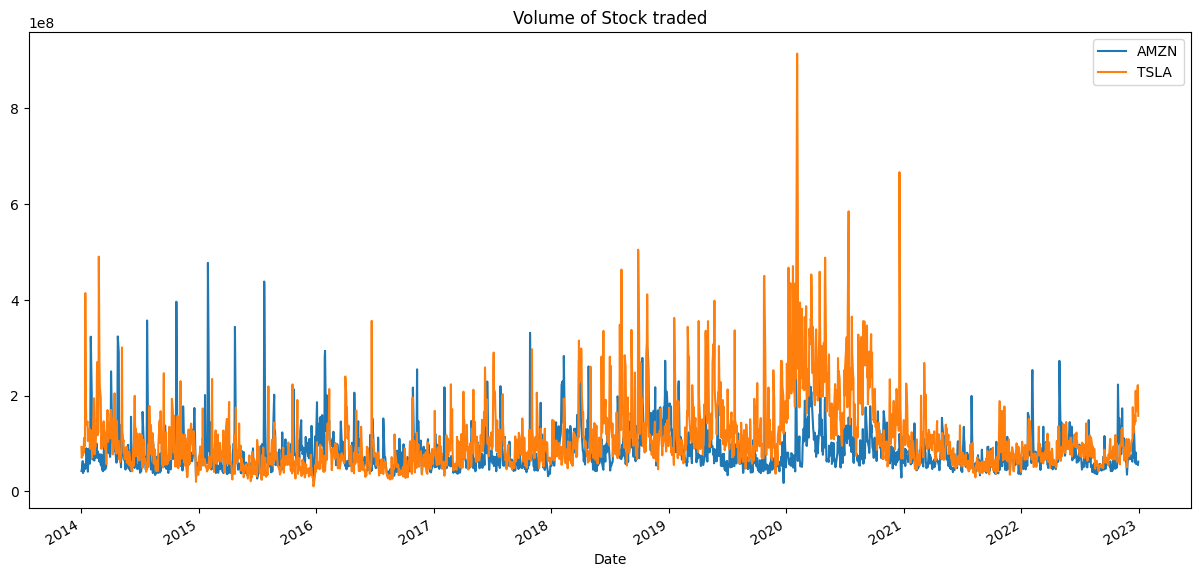

In [ ]:
#Volume empresa vs Tesla
amznT['Volume'].plot(label = consult, figsize = (15,7))
tslaT['Volume'].plot(label = 'TSLA')

plt.title('Volume of Stock traded')
plt.legend()

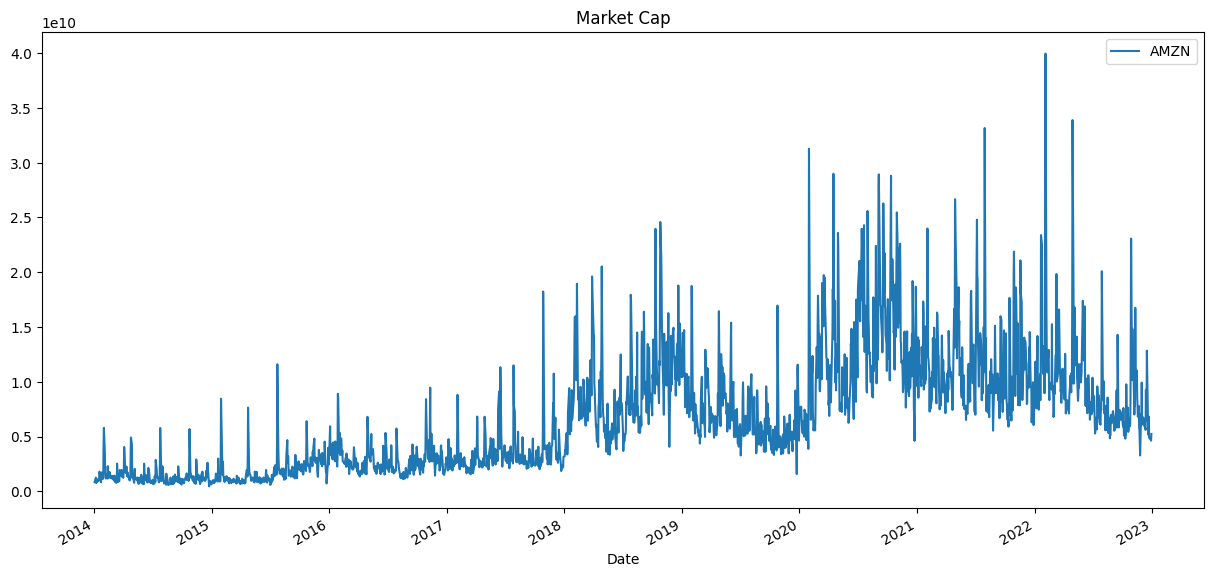

In [ ]:
#Market Capitalizacion
amznT['MarktCap'] = amznT['Adj Close'] * amznT['Volume']

amznT['MarktCap'].plot(label = consult, figsize = (15,7))

plt.title('Market Cap')
plt.legend()

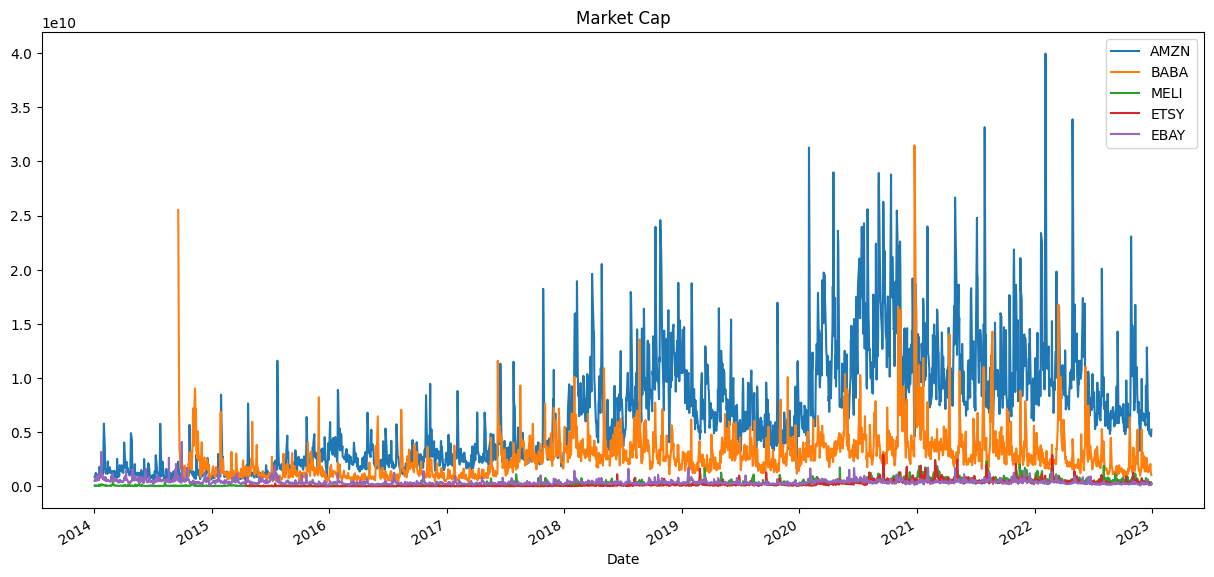

In [ ]:
#Market Capitalisation grupo 1
amznT['MarktCap'] = amznT['Adj Close'] * amznT['Volume']
babaT['MarktCap'] = babaT['Adj Close'] * babaT['Volume']
meliT['MarktCap'] = meliT['Adj Close'] * meliT['Volume']
etsyT['MarktCap'] = etsyT['Adj Close'] * etsyT['Volume']
ebayT['MarktCap'] = ebayT['Adj Close'] * ebayT['Volume']


amznT['MarktCap'].plot(label = consult, figsize = (15,7))
babaT['MarktCap'].plot(label = 'BABA')
meliT['MarktCap'].plot(label = 'MELI')
etsyT['MarktCap'].plot(label = 'ETSY')
ebayT['MarktCap'].plot(label = 'EBAY')


plt.title('Market Cap')
plt.legend()

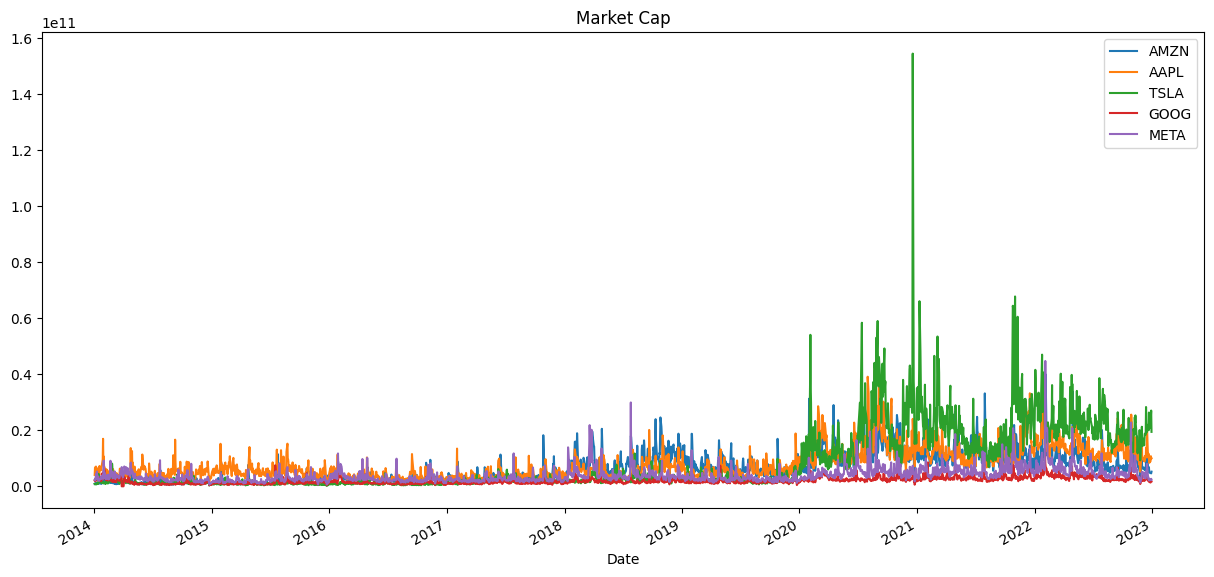

In [ ]:
#Market Capitalizacion grupo 2
amznT['MarktCap'] = amznT['Adj Close'] * amznT['Volume']
aaplT['MarktCap'] = aaplT['Adj Close'] * aaplT['Volume']
tslaT['MarktCap'] = tslaT['Adj Close'] * tslaT['Volume']
googT['MarktCap'] = googT['Adj Close'] * googT['Volume']
metaT['MarktCap'] = metaT['Adj Close'] * metaT['Volume']


amznT['MarktCap'].plot(label = consult, figsize = (15,7))
aaplT['MarktCap'].plot(label = 'AAPL')
tslaT['MarktCap'].plot(label = 'TSLA')
googT['MarktCap'].plot(label = 'GOOG')
metaT['MarktCap'].plot(label = 'META')


plt.title('Market Cap')
plt.legend()

<Axes: xlabel='Date'>

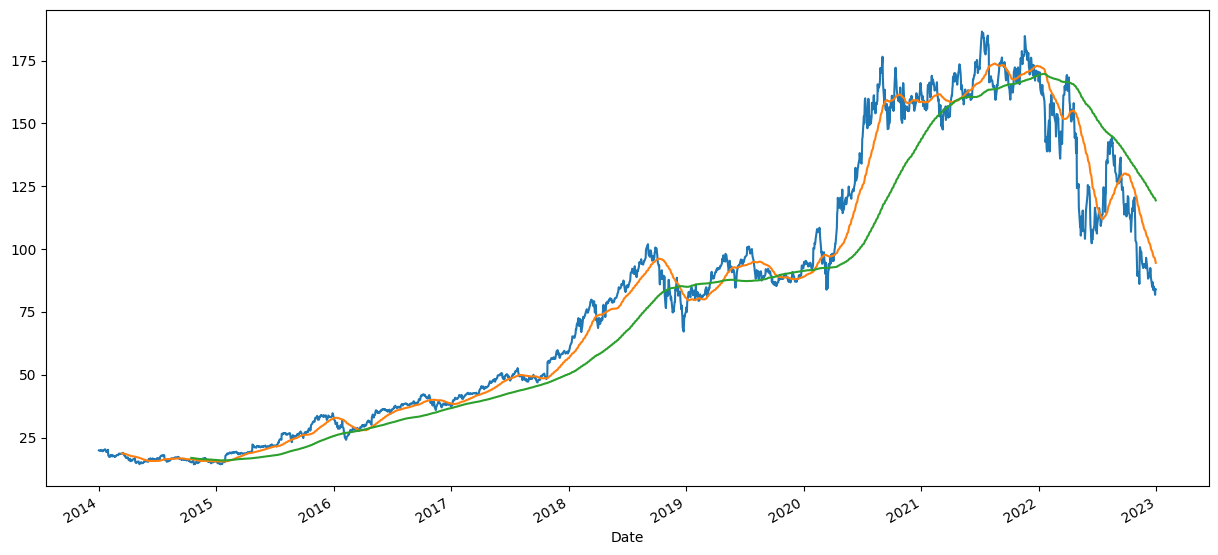

In [ ]:
#Moving Averages
amznT['MA50'] = amznT['Adj Close'].rolling(50).mean()
amznT['MA200'] = amznT['Adj Close'].rolling(200).mean()
amznT['Adj Close'].plot(figsize = (15,7))
amznT['MA50'].plot()
amznT['MA200'].plot()

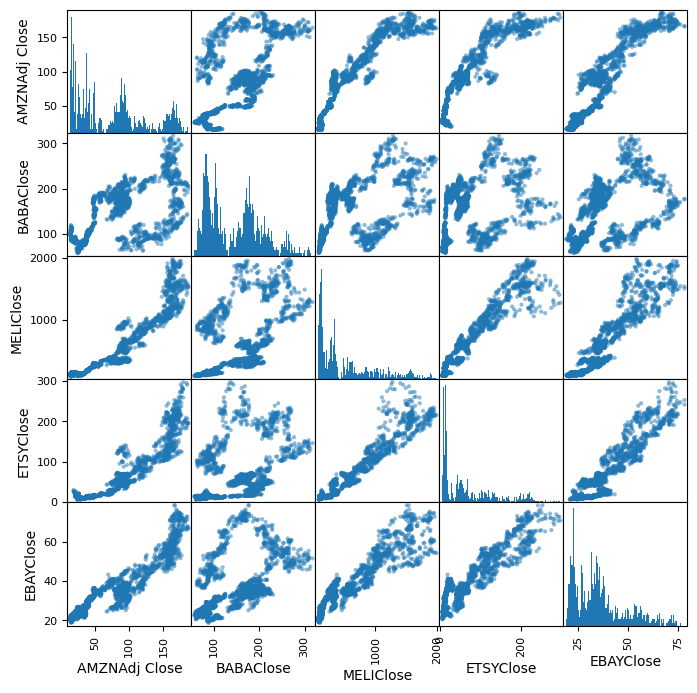

In [ ]:
#Scatter plot matrix grupo 1
data = pd.concat([amznT['Adj Close'],babaT['Adj Close'],meliT['Adj Close'],etsyT['Adj Close'],ebayT['Adj Close']],axis = 1)
data.columns = [consult + 'Adj Close','BABAClose','MELIClose','ETSYClose','EBAYClose']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250})
print("")

Los stocks de Amazon tienen una correlación lineal fuerte con los de eBay.

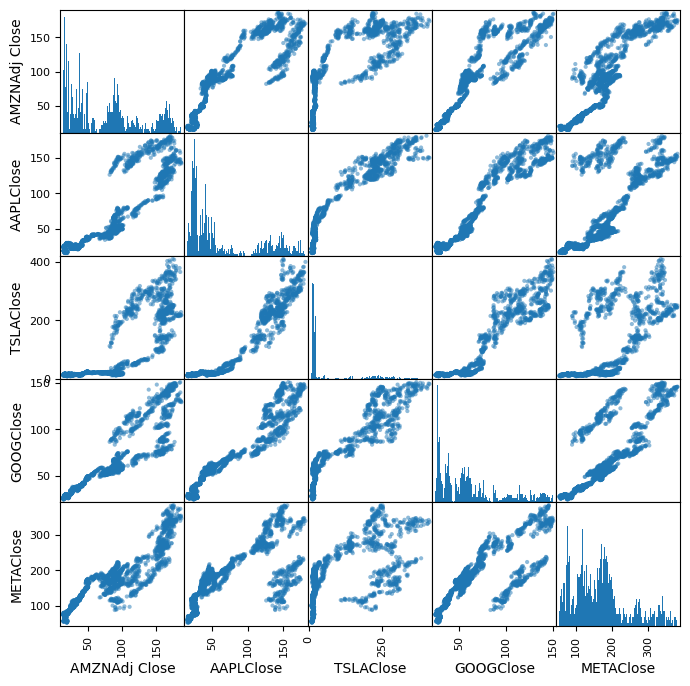

In [ ]:
#Scatter plot matrix grupo 2
data = pd.concat([amznT['Adj Close'],aaplT['Adj Close'],tslaT['Adj Close'],googT['Adj Close'],metaT['Adj Close']],axis = 1)
data.columns = [consult + 'Adj Close','AAPLClose','TSLAClose','GOOGClose','METAClose']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250})
print("")

Los stocks de Amazon tienen una correlación lineal más fuerte con Alphabet y Meta, que con las demás comapñías del grupo 2.

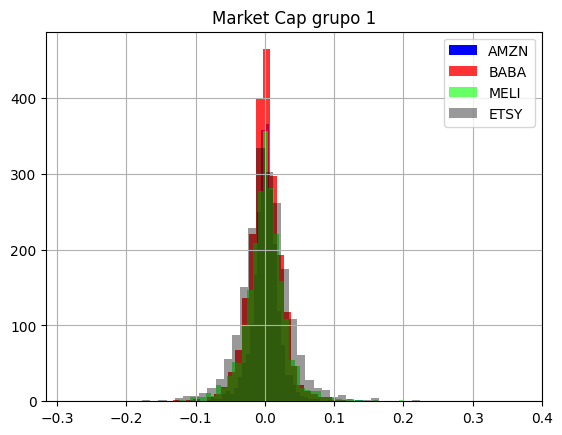

In [ ]:
#Daily Percentage Change grupo 1
amznT['returns'] = (amznT['Adj Close']/amznT['Adj Close'].shift(1)) - 1
babaT['returns'] = (babaT['Adj Close']/babaT['Adj Close'].shift(1)) - 1
meliT['returns'] = (meliT['Adj Close']/meliT['Adj Close'].shift(1)) - 1
etsyT['returns'] = (etsyT['Adj Close']/etsyT['Adj Close'].shift(1)) - 1

amznT['returns'].hist(label = consult,bins=50,fc=(0, 0, 1, 1))
babaT['returns'].hist(label = 'BABA',bins=50, fc=(1, 0, 0, 0.8))
meliT['returns'].hist(label = 'MELI',bins=50, fc=(0, 1, 0, 0.6))
etsyT['returns'].hist(label = 'ETSY',bins=50, fc=(0, 0, 0, 0.4))

plt.title('Market Cap grupo 1')
plt.legend()

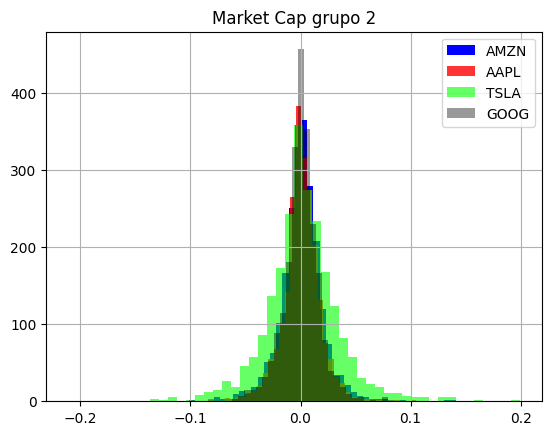

In [ ]:
#Daily Percentage Change grupo 2
amznT['returns'] = (amznT['Adj Close']/amznT['Adj Close'].shift(1)) - 1
aaplT['returns'] = (aaplT['Adj Close']/aaplT['Adj Close'].shift(1)) - 1
tslaT['returns'] = (tslaT['Adj Close']/tslaT['Adj Close'].shift(1)) - 1
googT['returns'] = (googT['Adj Close']/googT['Adj Close'].shift(1)) - 1

amznT['returns'].hist(label = consult,bins=50,fc=(0, 0, 1, 1))
aaplT['returns'].hist(label = 'AAPL',bins=50, fc=(1, 0, 0, 0.8))
tslaT['returns'].hist(label = 'TSLA',bins=50, fc=(0, 1, 0, 0.6))
googT['returns'].hist(label = 'GOOG',bins=50, fc=(0, 0, 0, 0.4))

plt.title('Market Cap grupo 2')
plt.legend()

In [ ]:
close_px = amznT['Adj Close']
mavg = close_px.rolling(window=100).mean()
print(mavg)

Date
2014-01-02         NaN
2014-01-03         NaN
2014-01-06         NaN
2014-01-07         NaN
2014-01-08         NaN
                ...   
2022-12-23    112.2975
2022-12-27    111.7022
2022-12-28    111.1124
2022-12-29    110.5601
2022-12-30    110.0218
Name: Adj Close, Length: 2266, dtype: float64


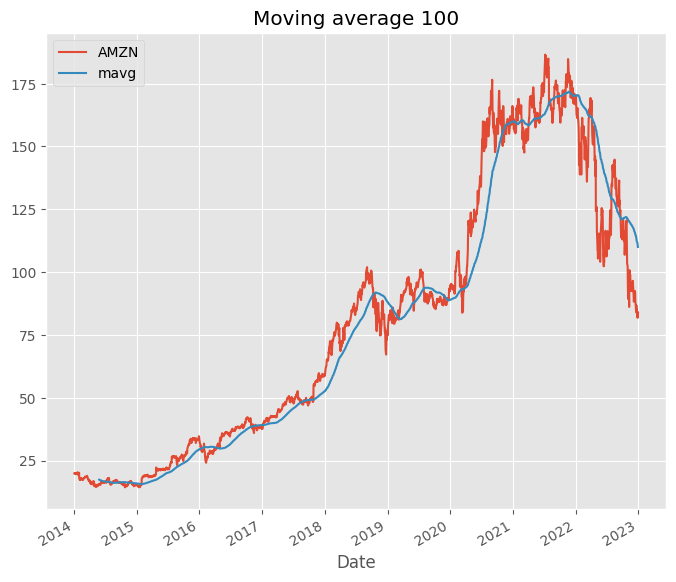

In [ ]:
# Adjusting the size of matplotlib
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label=consult)
mavg.plot(label='mavg')

plt.title('Moving average 100')
plt.legend()

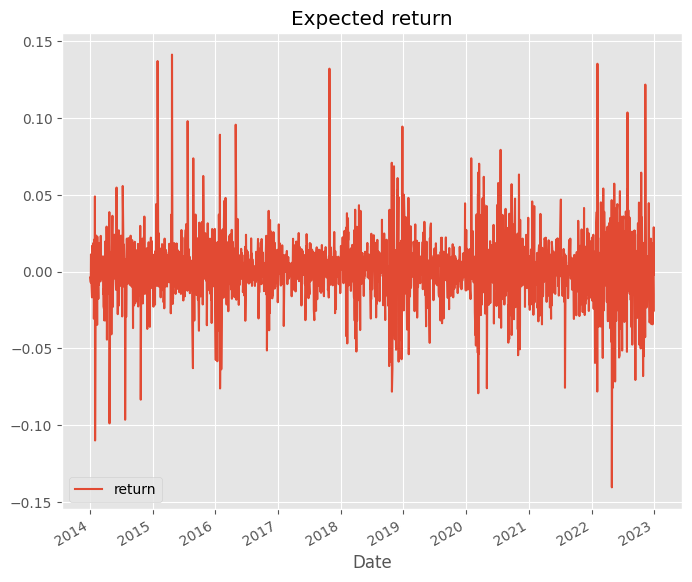

In [ ]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

plt.title('Expected return')
plt.legend()

### Modelos Predictivos

In [ ]:
#Establecemos las fechas de consulta:
start = '2010-01-01'
end = '2023-01-30'

consult = "AMZN"
#Tabla completa de los stocks de Amazon
amznP = pdr.get_data_yahoo(consult, start, end)

amznP.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
2010-01-08,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


In [ ]:
dfreg = amznP.loc[:,["Adj Close","Volume"]]
dfreg["HL_PCT"] = (amznP["High"] - amznP["Low"]) / amznP["Close"] * 100.0
dfreg["PCT_change"] = (amznP["Close"] - amznP["Open"]) / amznP["Open"] * 100.0
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2010-01-04,6.6950,151998000,2.591487,-1.724768
2010-01-05,6.7345,177038000,2.724780,0.944311
2010-01-06,6.6125,143576000,2.328919,-1.745911
2010-01-07,6.5000,220604000,2.707694,-1.522614
2010-01-08,6.6760,196610000,3.482625,2.267161


In [ ]:
# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [ ]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
#Test con R^2
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

#Resultados
print('Resultado de R2 para regresión lineal ', confidencereg)
print('Resultado de R2 para regresión cuadratica 2 ', confidencepoly2)
print('Resultado de R2 para regresión cuadratica 3 ', confidencepoly3)
print('Resultado de R2 para regresión KNN ', confidenceknn)

Resultado de R2 para regresión lineal  0.9697542119081599
Resultado de R2 para regresión cuadratica 2  0.9726668857674823
Resultado de R2 para regresión cuadratica 3  0.961432657260876
Resultado de R2 para regresión KNN  0.9558503285513044


Sin embargo para evitar el riesgo de overfitting vamos a realizar una validación cruzada, en dónde los modelos se pondrá a prueba en más de una sola parte. Esto nos dará una mejor idea del desempeño de los modelos.

In [ ]:
#Regresión Lineal con Validacion cruzada
clfreg2 = LinearRegression(n_jobs=-1)
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(clfreg2, X, y, cv=cv)
print("Resultado de la validación cruzada para regresión lineal: ")
print(scores)

Resultado de la validación cruzada para regresión lineal: 
[0.96838303 0.97259515 0.97603215 0.97155798 0.97299098]


In [ ]:
#Regresión Cuadratica 2 con Validacion cruzada
clfpoly22 = make_pipeline(PolynomialFeatures(2), Ridge())
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(clfpoly22, X, y, cv=cv)
print("Resultado de la validación cruzada para regresión cuadrática 2: ")
print(scores)

Resultado de la validación cruzada para regresión cuadrática 2: 
[0.97138106 0.97465801 0.97693785 0.97407344 0.97487738]


In [ ]:
#Regresión Cuadratica 3 con Validacion cruzada
clfpoly32 = make_pipeline(PolynomialFeatures(3), Ridge())
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(clfpoly32, X, y, cv=cv)
print("Resultado de la validación cruzada para regresión cuadrática 3: ")
print(scores)

Resultado de la validación cruzada para regresión cuadrática 3: 
[0.97199117 0.97533956 0.97520508 0.97285695 0.97478579]


In [ ]:
#Regresión KNN con Validacion cruzada
clfknn2 = KNeighborsRegressor(n_neighbors=2)
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(clfknn2, X, y, cv=cv)
print("Resultado de la validación cruzada para regresión KNN: ")
print(scores)

Resultado de la validación cruzada para regresión KNN: 
[0.95092665 0.95697778 0.96311712 0.95324611 0.9579718 ]


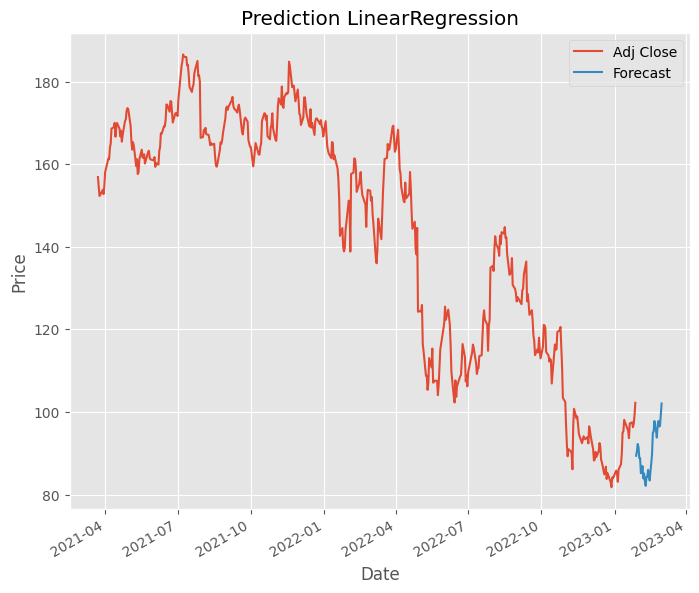

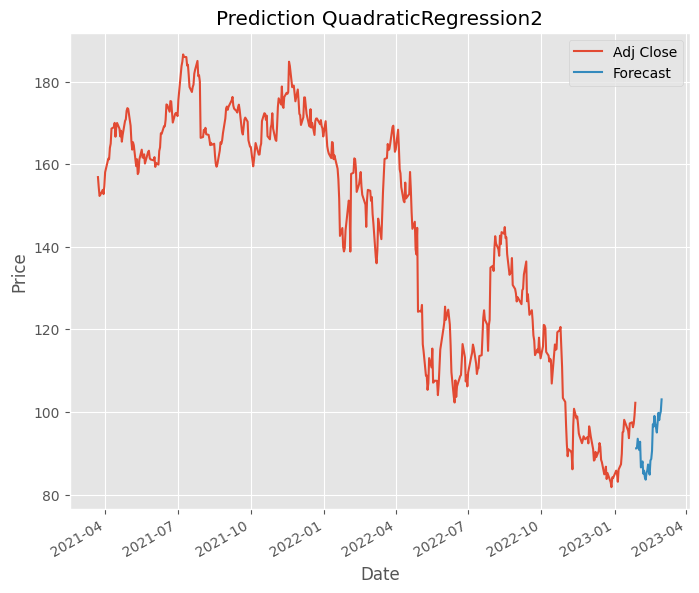

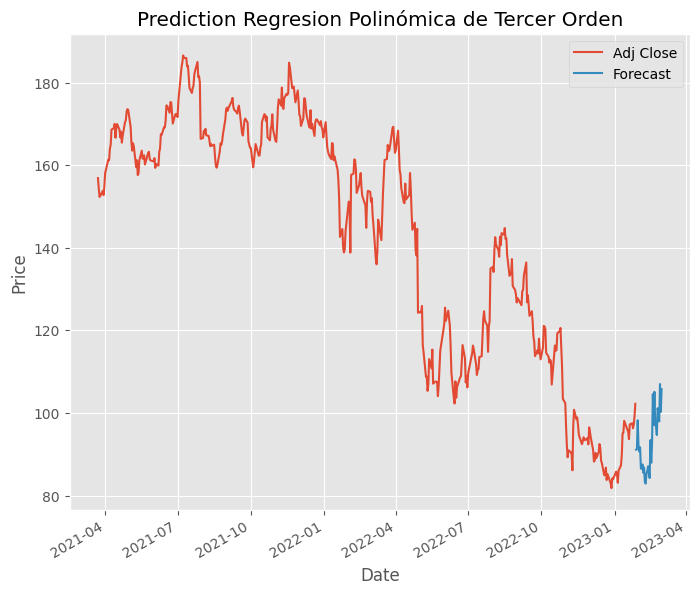

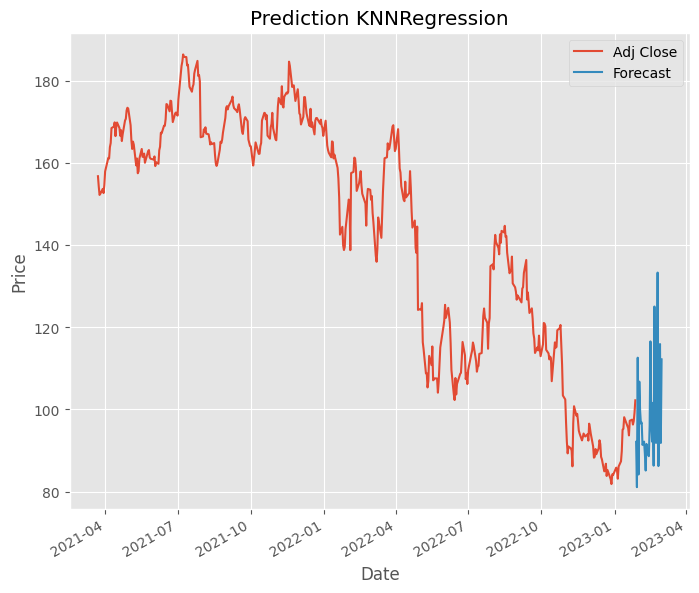

In [ ]:
dfreg['Forecast'] = np.nan
forecast_set_a = clfreg.predict(X_lately)
forecast_set_b = clfpoly2.predict(X_lately)
forecast_set_c = clfpoly3.predict(X_lately)
forecast_set_d = clfknn.predict(X_lately)

def graphpred(input,dfreg,nameP):
  forecast_set = copy.copy(input)

  last_date = dfreg.iloc[-1].name
  last_unix = last_date
  next_unix = last_unix + datetime.timedelta(days=1)

  for i in forecast_set:
      next_date = next_unix
      next_unix += datetime.timedelta(days=1)
      dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
  dfreg['Adj Close'].tail(500).plot()
  dfreg['Forecast'].tail(500).plot()

  plt.title('Prediction ' + nameP)
  plt.legend(loc=1)
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.show()

graphpred(forecast_set_a,copy.copy(dfreg), "LinearRegression")
graphpred(forecast_set_b,copy.copy(dfreg), "QuadraticRegression2")
graphpred(forecast_set_c,copy.copy(dfreg), "Regresion Polinómica de Tercer Orden")
graphpred(forecast_set_d,copy.copy(dfreg), "KNNRegression")


### Modelos Prescriptivos

Como modelo prescriptivo vamos a utilizar un modelo de bosque aleatorio. Este modelo no utiliza simplemente el valor del stock al final del día, más bien utiliza todos los atributos de la tabla para realizar las predicciones.

In [ ]:
#Establecemos las fechas de consulta:
start = '2020-01-01'
end = '2023-05-01'

consult = "AMZN"
#Tabla completa de los stocks de Amazon
amznP = pdr.get_data_yahoo(consult, start, end)

amznP.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,107.660004,109.230003,105.070000,106.209999,106.209999,69575600
2023-04-25,104.910004,105.449997,102.449997,102.570000,102.570000,65026800
2023-04-26,105.040001,106.620003,104.099998,104.980003,104.980003,73803800
2023-04-27,108.160004,110.860001,106.800003,109.820000,109.820000,149961200
2023-04-28,107.730003,109.480003,104.330002,105.449997,105.449997,130565000


In [ ]:
#Separamos los datos en entrenamiento y prueba
x = amznP.iloc[:, 0:5].values
y = amznP.iloc[:, 4].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=0)

#Hacemos preprocesado de los datos
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
print(x.shape)

(837, 5)


In [ ]:
#Entrenamos el modelo de Random Forest especificando (el número de arboles de decisión, la profundiad maxima de los arboles, la cantidad de datos minima antes de que la prueba se separe, la minima cantidad de hojas para se separado y los numeros aleatorios generados)
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)

In [ ]:
#Regresión Bosques Aleatorios con Validacion cruzada
model2 = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = cross_val_score(model2, x, y, cv=cv)
print("Resultado de la validación cruzada para regresión Bosque Aleatorio: ")
print(scores)

Resultado de la validación cruzada para regresión Bosque Aleatorio: 
[0.99992431 0.99989554 0.99994659 0.9999423  0.99994033]


In [ ]:
print("Error absoluto medio:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Error cuadrático medio:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Error de raíz cuadrada media:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("Error de R2:", round(metrics.r2_score(y_test, predict), 4))
print(f'Puntaje de entrenamiento : {model.score(x_train, y_train) * 100:.2f}% y Puntaje de prueba : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Error absoluto medio: 0.1259
Error cuadrático medio: 0.0703
Error de raíz cuadrada media: 0.2652
Error de R2: 0.9999
Puntaje de entrenamiento : 100.00% y Puntaje de prueba : 99.99% using Random Tree Regressor.
Accuracy: 99.89 %.


In [ ]:
#Vamos entonces a guardar las predicciones realizadas y las separamos entre un año, un mes y cinco días
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=amznP.index[-1], periods=len(predict), freq="D"))
oneyear_df = pd.DataFrame(predictions[:252])
onemonth_df = pd.DataFrame(predictions[:21])
fivedays_df = pd.DataFrame(predictions[:5])


Precio de compra y fecha: 
            Predictions
2023-11-24    83.698841
Precio de venta y fecha: 
            Predictions
2023-09-30   182.291603


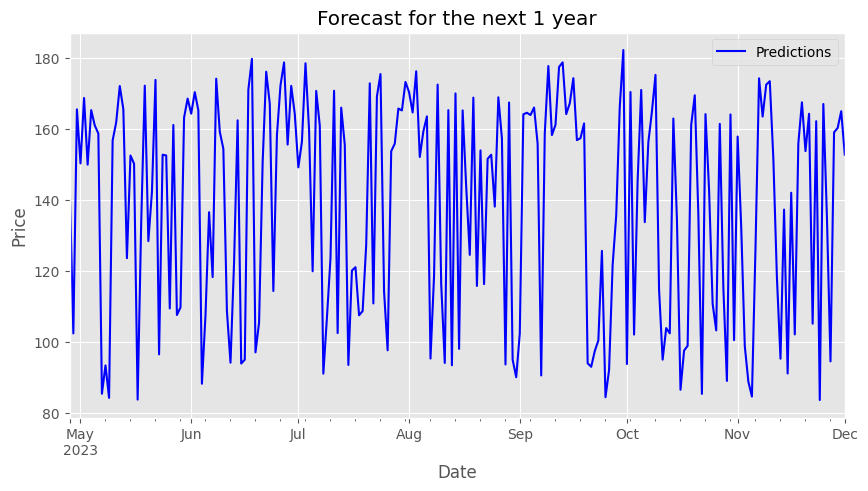

In [ ]:
#Vamos entonces a gráficar las predicciones y a imprimir el valor de compre y de vente para los stock

buy_price = min(oneyear_df["Predictions"])
sell_price = max(oneyear_df["Predictions"])
oneyear_buy = oneyear_df.loc[oneyear_df["Predictions"] == buy_price]
oneyear_sell = oneyear_df.loc[oneyear_df["Predictions"] == sell_price]

print("Precio de compra y fecha: ")
print(oneyear_buy)
print("Precio de venta y fecha: ")
print(oneyear_sell)

oneyear_df["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Precio de compra y fecha: 
            Predictions
2023-05-17      83.8139
Precio de venta y fecha: 
            Predictions
2023-05-12   172.149347


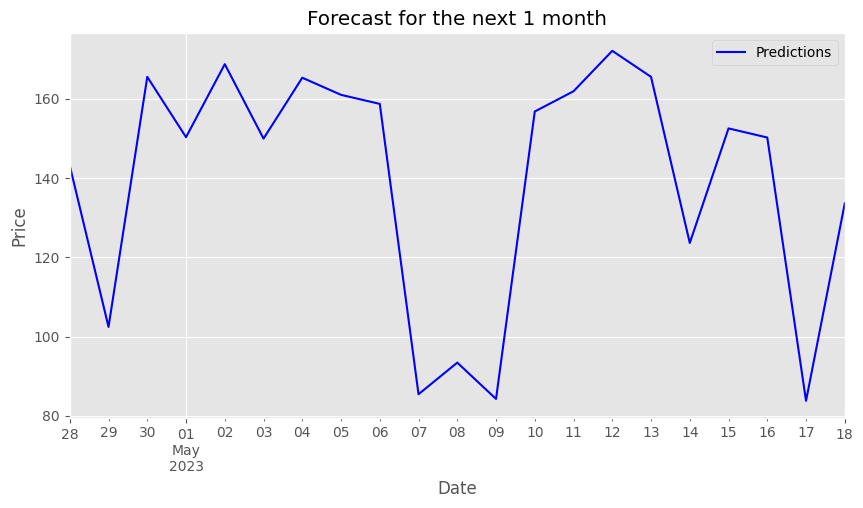

In [ ]:
buy_price = min(onemonth_df["Predictions"])
sell_price = max(onemonth_df["Predictions"])
onemonth_buy = onemonth_df.loc[onemonth_df["Predictions"] == buy_price]
onemonth_sell = onemonth_df.loc[onemonth_df["Predictions"] == sell_price]

print("Precio de compra y fecha: ")
print(onemonth_buy)
print("Precio de venta y fecha: ")
print(onemonth_sell)

onemonth_df["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 month", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Precio de compra y fecha: 
            Predictions
2023-04-29   102.463595
Precio de venta y fecha: 
            Predictions
2023-05-02   168.785413


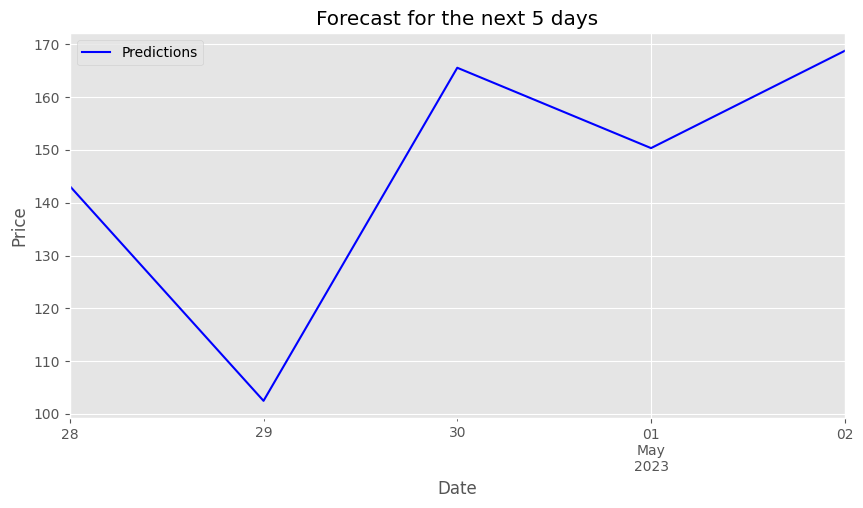

In [ ]:
buy_price = min(fivedays_df["Predictions"])
sell_price = max(fivedays_df["Predictions"])
fivedays_buy = fivedays_df.loc[fivedays_df["Predictions"] == buy_price]
fivedays_sell = fivedays_df.loc[fivedays_df["Predictions"] == sell_price]

print("Precio de compra y fecha: ")
print(fivedays_buy)
print("Precio de venta y fecha: ")
print(fivedays_sell)

fivedays_df["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 5 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Porbamos ahora una red neuronal


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

# Descargar los datos de Yahoo Finance
df = yf.download("AAPL", start="2016-01-01", end="2021-01-01")

# Seleccionar las columnas de interés
df = df[['Open', 'High', 'Low', 'Close']]

# Crear una nueva columna con el precio de cierre ajustado
df['Adj Close'] = df['Close'].shift(1)

# Eliminar la primera fila
df = df.iloc[1:]

# Normalizar los datos
min_values = df.min()
max_values = df.max()
df = (df - min_values) / (max_values - min_values)

# Crear arrays separados para las características y la variable objetivo
X = np.array(df[['Open', 'High', 'Low']])
y = np.array(df['Adj Close'])


[*********************100%***********************]  1 of 1 completed


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

# Descargar datos de Yahoo Finance
ticker = "AMZN"
data = yf.download(ticker, period="max")
data = data[['Open', 'High', 'Low', 'Close']]

# Normalizar los datos
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Convertir los datos a series de tiempo de 30 días
X = []
y = []
for i in range(30, len(data)):
    X.append(data[i-30:i])
    y.append(data[i, 3])

X, y = np.array(X), np.array(y)

# Crear el modelo
model = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(30, 4)),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=1)
])

# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Aplicar validación cruzada
kf = KFold(n_splits=5, shuffle=True)
losses = []
for train_idx, test_idx in kf.split(X):
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

    loss = model.evaluate(X_test, y_test)
    losses.append(loss)

mean_loss = np.mean(losses)
std_loss = np.std(losses)
print("Mean squared error on test set:", mean_loss)
print("Standard deviation of mean squared error:", std_loss)


[*********************100%***********************]  1 of 1 completed
Epoch 1/50
163/163 [==============================] - 4s 16ms/step - loss: 0.0040
Epoch 2/50
163/163 [==============================] - 2s 15ms/step - loss: 9.5297e-04
Epoch 3/50
163/163 [==============================] - 2s 13ms/step - loss: 8.1855e-04
Epoch 4/50
163/163 [==============================] - 1s 8ms/step - loss: 7.2001e-04
Epoch 5/50
163/163 [==============================] - 1s 8ms/step - loss: 6.5194e-04
Epoch 6/50
163/163 [==============================] - 1s 8ms/step - loss: 6.8484e-04
Epoch 7/50
163/163 [==============================] - 1s 8ms/step - loss: 5.1085e-04
Epoch 8/50
163/163 [==============================] - 2s 12ms/step - loss: 4.6417e-04
Epoch 9/50
163/163 [==============================] - 2s 12ms/step - loss: 4.4906e-04
Epoch 10/50
163/163 [==============================] - 1s 8ms/step - loss: 5.2927e-04
Epoch 11/50
163/163 [==============================] - 1s 8ms/step - loss: 4.50

### Biblio

Stock Analisis

https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

https://www.analyticsvidhya.com/blog/2021/07/stock-prices-analysis-with-python/

https://levelup.gitconnected.com/stock-market-analysis-using-python-pandas-ec278f76e217

Linear programming for finances

https://medium.com/analytics-vidhya/linear-programming-optimization-in-finance-using-python-8d1e04b5815

Stock Prediction

https://towardsdatascience.com/predicting-future-stock-market-trends-with-python-machine-learning-2bf3f1633b3c

https://www.datacamp.com/tutorial/lstm-python-stock-market

https://www.simplilearn.com/tutorials/machine-learning-tutorial/stock-price-prediction-using-machine-learning

https://medium.com/@maryamuzakariya/project-predict-stock-prices-using-random-forest-regression-model-in-python-fbe4edf01664

Medir regresión

https://scikit-learn.org/stable/modules/model_evaluation.html